# 정현석 일차 비전 스터디 ! 

- code로 배우는 딥러닝 필수 opencv 스킬

## 패키지 import 

In [14]:
!pip install numpy
!pip install matplotlib
!pip3 install opencv-python

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import Image
from IPython.core.display import HTML

## opencv는 사진을 BGR로 저장합니다..!

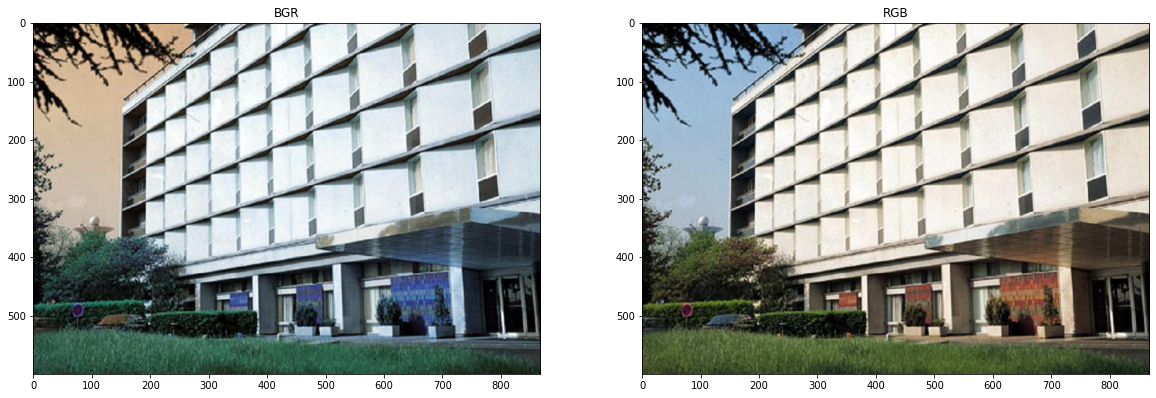

In [16]:
# image imread
image = cv2.imread('./data/building.jpg')

# original image
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('BGR')
plt.imshow(image)

# cvtColor image
plt.subplot(1, 2, 2)
plt.title('RGB')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
# Opencv는 왜 BGR포맷을 쓸까? TMI
"""
openCV의 창시자 그레이 브라드스키 박사
별다른 이유가 없다... BGR..
초창기 카메라 산업 개빌자들이 BGR을 많이 썻기 떄문...

초창기 산업 개발자들은 why BGR을 많이 사용했을까?
Endianness와 관련이 있음
CPU에 따라 값을 메모리에 저장하고 읽을떄, 
큰 값을 먼저 쓰는 빅엔디안과 (MSB),
작은 값을 먼저 쓰는 리틀엔디언 방식(LSB)이 있는데

인텔에서 만든 x86 계열의 cpu는 리틀엔디언을 따름(openCV는 인텔의 작품..)

BGR 포맷으로 이루어진 색상 정보는 각 채널당 8비트로 이루어 지고 
3개의 채널을 사용하므로 24비트 즉, 0xBBGGRR가 필요합니다. 
24비트 단위의 입출력은 효과적이지 않으니 
1
메모리에 저장할때 unsigned 32비트를 사용하는것이 
일반적인데 이렇게 되면 0x00BBGGRR 가 됩니다.

이 값을 x86 계열의 CPU 처럼 리틀엔디언을 사용해서 저장하면 메모리에는  
0xRRGGBB00가 저장됩니다.
"""

'\nopenCV의 창시자 그레이 브라드스키 박사\n별다른 이유가 없다... BGR..\n초창기 카메라 산업 개빌자들이 BGR을 많이 썻기 떄문...\n\n초창기 산업 개발자들은 why BGR을 많이 사용했을까?\nEndianness와 관련이 있음\nCPU에 따라 값을 메모리에 저장하고 읽을떄, \n큰 값을 먼저 쓰는 빅엔디안과 (MSB),\n작은 값을 먼저 쓰는 리틀엔디언 방식(LSB)이 있는데\n\n인텔에서 만든 x86 계열의 cpu는 리틀엔디언을 따름(openCV는 인텔의 작품..)\n\nBGR 포맷으로 이루어진 색상 정보는 각 채널당 8비트로 이루어 지고 \n3개의 채널을 사용하므로 24비트 즉, 0xBBGGRR가 필요합니다. \n24비트 단위의 입출력은 효과적이지 않으니 \n1\n메모리에 저장할때 unsigned 32비트를 사용하는것이 \n일반적인데 이렇게 되면 0x00BBGGRR 가 됩니다.\n\n이 값을 x86 계열의 CPU 처럼 리틀엔디언을 사용해서 저장하면 메모리에는 \xa0\n0xRRGGBB00가 저장됩니다.\n'

# 1.Sharpening Filter
- kernels을 사용해서 가장자리를 강하고 강조해준다.
- 블러가 있는 이미지의 디테일을 살려준다.
- 필터는 가장자리 밝기를 높이는데 사용된다.

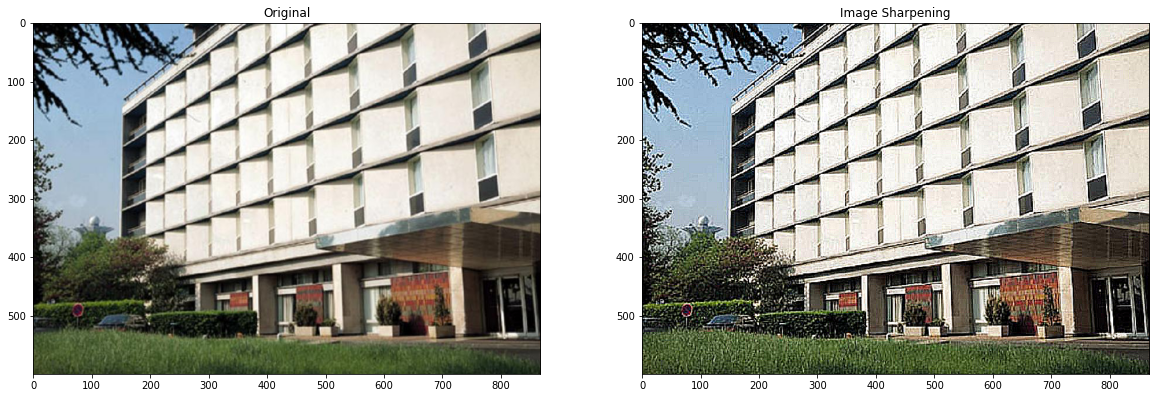

In [18]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image)

# Create our shapening kernerl we don't normalizer since the 
# the values in the matrix to 1 
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9 , -1],
                              [-1, -1, -1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)

plt.show()


#### cv2.filter2D 파라미터 
- cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None) -> dst

- src : 입력 영상

- ddepth : 출력 영상 데이터 타입. (e.g) cv2.CV_8U, cv2.CV_32F, cv2.CV_64F, -1을 지정하면 src와 같은 타입의 dst 영상을 생성합니다.

- kernel: 필터 마스크 행렬. 실수형.

- anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용

- delta: 추가적으로 더할 값

- borderType: 가장자리 픽셀 확장 방식

- dst: 출력 영상

### borderType

In [19]:
Image(url= "https://blog.kakaocdn.net/dn/bqCRsS/btqJVnLxfge/J6vzetwFK5P6NK18NekTD0/img.png")

### 커널 적용 방식

In [20]:
Image(url= "https://blog.kakaocdn.net/dn/dQUovh/btqJTGkHjtZ/RnYrfueInkT4kz9b2I4Ekk/img.png")

# 2. Thresholding, Binarization & Adaptive Thresholding

# 이미지 임계처리 이진화 방법 
- 기본 임계처리 방법
- 이진화 : 영상을 흑/백으로 분류하여 처리
- 임계값을 어떻게 결정할지가 매우 중요한 문제 
- 임계값 보다 크면 백, 작은면 흑
- 기본 임계처리는 매우 단순한 형태


# cv2.threshold(src, thresh, maxval, type)
    - thersh : 임계값
    - maxval : 임계값을 넘었을때 적용할 value
    - type : thresholding type
       - cv2.THRESH_BINARY: threshold보다 크면 value이고 아니면 0으로  
       - cv2.THRESH_BINARY_INV: threshold보다 크면 0이고 아니면 value로 
       - cv2.THRESH_TRUNC: threshold보다 크면 value로 지정하고 작으면 기존의 값 그대로 
       - cv2.THRESH_TOZERO: treshold_value보다 크면 픽셀 값 그대로 작으면 0으로 
       - cv2.THRESH_TOZERO_INV: threshold_value보다 크면 0으로 작으면 그대로 
   


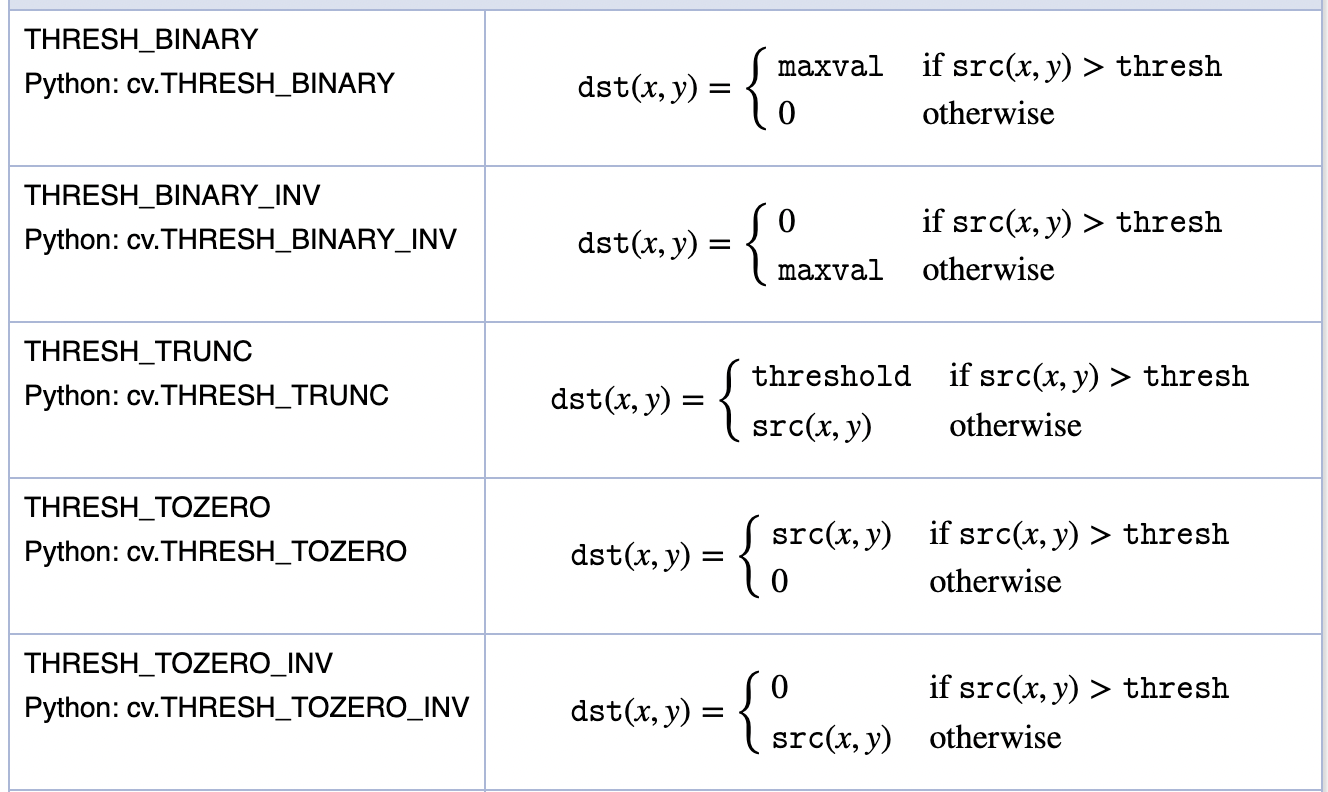

In [21]:
Image('thresh.png')

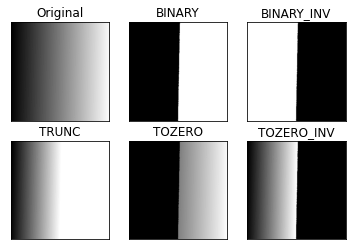

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./data/gradient.png',0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

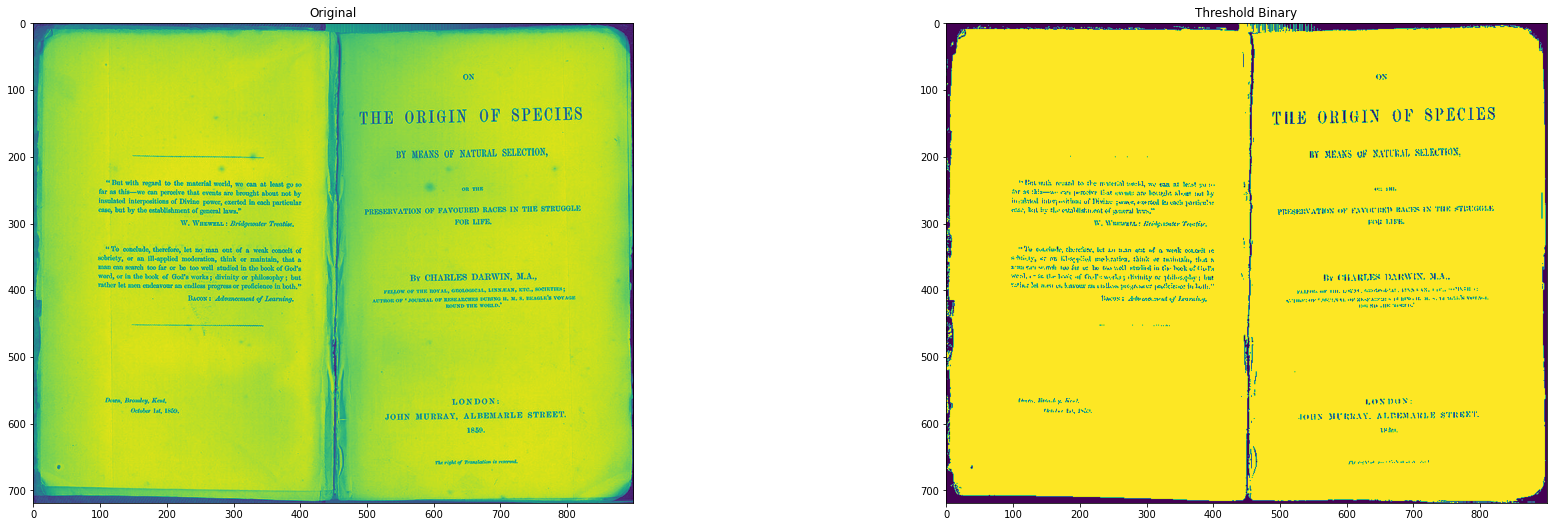

In [23]:
"""
cv2.imread(fileName, flag) --> return nump array

flag 
cv2.IMREAD_COLOR : 이미지 파일을 Color 값으로 불러옵니다(DeFault)
cv2.IMREAD_GRAYSCALRE : 이미지 Grayscale로 불러옵니다.
cv2.IMREAD_UNCHANGED : 이미지 파일을 alpha channel까지 불러옵니다.

flag 대신 1, 0, -1 로 읽기도 합니다
"""

image = cv2.imread('./data/Origin_of_Species.jpeg', 0)

plt.figure(figsize=(30, 30))
plt.subplot(3,2,1)
plt.title('Original')
plt.imshow(image)

ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.subplot(3,2,2)
plt.title("Threshold Binary")
plt.imshow(thresh1)


# 적응 임계처리 
- 단순 임계처리의 가장 큰 문제 한가지 기준으로 적용하면, 
- 이미지에 음영이 다르면 일부 영역이 모두 흰색 or 검정색으로 보여짐
- 이런 문제를 해결하기 위해 이미지의 작은 영역별로 thresholding 

### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
- maxValue : 임계값
- adaptiveMethod – thresholding value를 결정하는 계산 방법
- thresholdType – threshold type
- blockSize – thresholding을 적용할 영역 사이즈
- C – 평균이나 가중평균에서 차감할 값

### Adaptive Method 
- cv2.ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C :blockSize 영역의 모든 픽셀에 중심점으로부터의 거리에 대한 가우시안 가중치 적용

In [29]:
# 1차원 가우시안 분포(왼쪽) ->  평균값 : 0, 표준편차 : 1
Image(url='https://t1.daumcdn.net/cfile/tistory/2122D950539942B63A?download')


In [30]:
# 2차원 가우시안 분포(오른쪽) -> 평균값 : (0,0), 표준편차 : 1
Image(url='https://t1.daumcdn.net/cfile/tistory/27072F50539942B616?download')

In [24]:
# ret : frame으로 정보 받는지 여부 확인 

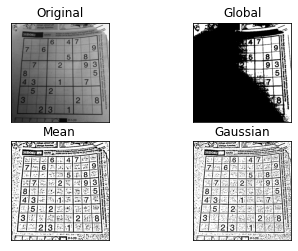

In [25]:
img = cv2.imread('./data/sudoku.png', 0)
# img = cv2.medianBlur(img,5)

ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 영상에 블러링(가우시안 필터)
- 평균값 필터는 가까이 있는 픽셀과 멀리 있는 픽셀 모두 같은 가중치를 사용 평균 계산
- 멀리 있는 픽셀의 영향을 많이 받아 퀄리티 낮아짐
- 단점 보안을 위해 가우시안 필터 사용 


In [31]:
Image(url='https://blog.kakaocdn.net/dn/3hxC7/btqJU4lkGql/DctAZcntV6dKoG0JaSgZYK/img.png')

In [ ]:
# 가우시안 필터를 왜 쓸까?

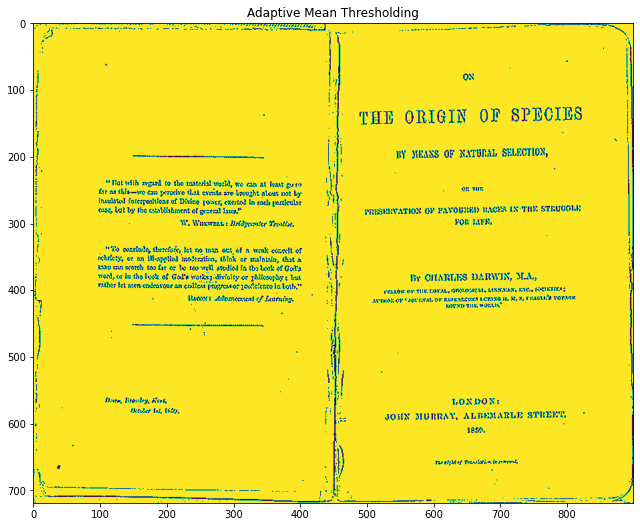

In [26]:
image = cv2.GaussianBlur(image, (3,3), 0)
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 3, 5)
plt.figure(figsize=(30,30))
plt.subplot(3,2,3)
plt.title('Adaptive Mean Thresholding')
plt.imshow(thresh)